In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import numpy as np
import vmo.analysis as van
import vmo.generate as vge
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
import librosa, vmo
%matplotlib inline

In [16]:
# Setup
target_file = '../audioTestFiles/tenor_sax_13.wav'
query_file = '../audioTestFiles/Jazz_C2.wav'

fft_size = 8192*4
hop_size = fft_size/2

In [17]:
# Read target wave file 
y, sr = librosa.load(target_file, sr = 44100)
C = librosa.feature.chromagram(y=y, sr=sr, n_fft=fft_size, hop_length=hop_size, octwidth = None)
feature = np.log(C+np.finfo(float).eps)
feature = pre.normalize(feature)

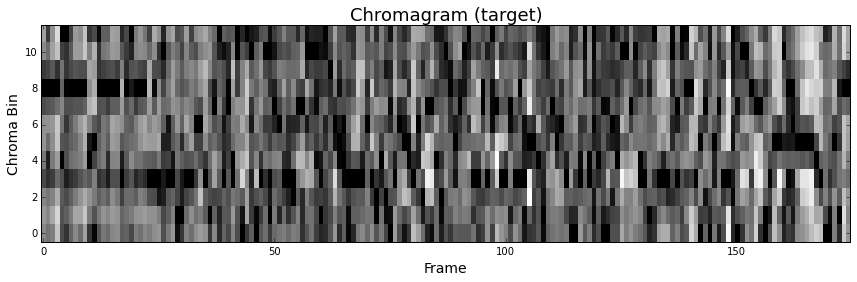

In [29]:
plt.figure(figsize = (12,4))
plt.imshow(feature, aspect = 'auto', origin = 'lower', interpolation = 'nearest', cmap ='Greys')
plt.title('Chromagram (target)', fontsize = 18)
plt.xlabel('Frame', fontsize = 14)
plt.ylabel('Chroma Bin', fontsize = 14)
plt.tight_layout()

In [19]:
# Build target oracle
chroma_frames = feature.transpose()
r = (0.0, 0.25, 0.001) 
ideal_t = vmo.find_threshold(chroma_frames, r = r,flag = 'a',VERBOSE = False)
oracle_t = vmo.build_oracle(chroma_frames, flag = 'a', 
                            threshold = ideal_t[0][1], 
                            feature = 'chroma')

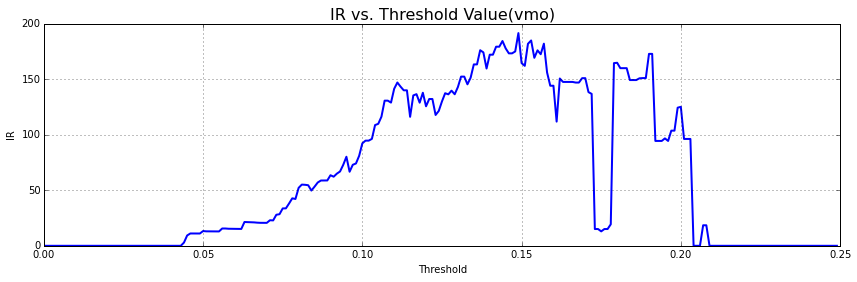

In [26]:
x = np.array([i[1] for i in ideal_t[1]])
y = [i[0] for i in ideal_t[1]]
fig = plt.figure(figsize = (12,4))
plt.plot(x, y, linewidth = 2)
plt.title('IR vs. Threshold Value(vmo)', fontsize = 16)
plt.grid(b = 'on')
plt.xlabel('Threshold')
plt.ylabel('IR')
plt.xlim(0,0.25)
ax.set_xscale('log')
plt.tight_layout()

In [28]:
# Read query wave file
y_q, sr = librosa.load(query_file, sr = 44100)
C_q = librosa.feature.chromagram(y=y_q, sr=sr, n_fft=fft_size, hop_length=hop_size, octwidth = None)
feature_q = np.log(C_q+np.finfo(float).eps)
feature_q = pre.normalize(feature_q)

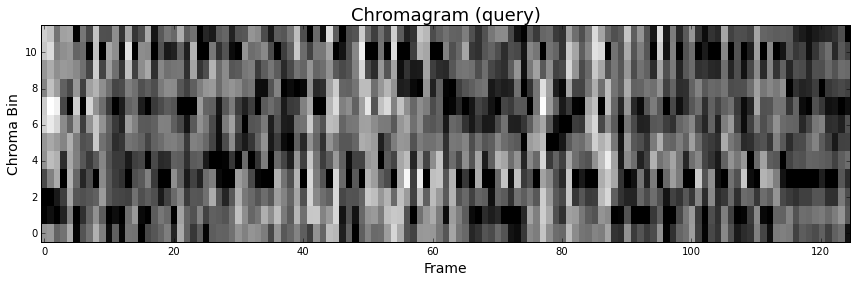

In [30]:
plt.figure(figsize = (12,4))
plt.imshow(feature_q, aspect = 'auto', origin = 'lower', interpolation = 'nearest', cmap ='Greys')
plt.title('Chromagram (query)', fontsize = 18)
plt.xlabel('Frame', fontsize = 14)
plt.ylabel('Chroma Bin', fontsize = 14)
plt.tight_layout()

In [36]:
# Query-matching and re-synthesis 
path, cost, i_hat = van.query_complete(oracle_t, chroma_frames_q, method = 'trn', selftrn = False)
vge.audio_synthesis(target_file, 'vmo_synthesis_test.wav', path[i_hat], fft_size, hop_size)

(array([ 0., -3., -6., ...,  0.,  0.,  0.]),
 array([  1.00000000e-05,   1.00091923e-05,   1.00367694e-05, ...,
          1.00367694e-05,   1.00091923e-05,   1.00000000e-05]))